In [45]:
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1
import torch
import torchvision
from torchvision import transforms

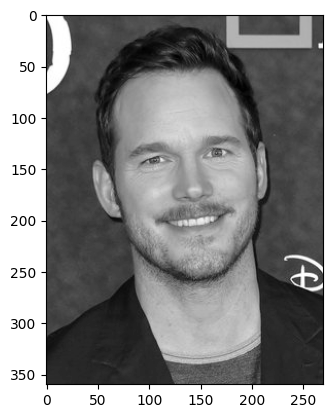

In [53]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
img = cv2.imread("chris.jpg")

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # invierto canales
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY) # imagen en blanco y negro
plt.imshow(imgGray, cmap="gray") # muestro la imagen

(-0.5, 171.5, 171.5, -0.5)

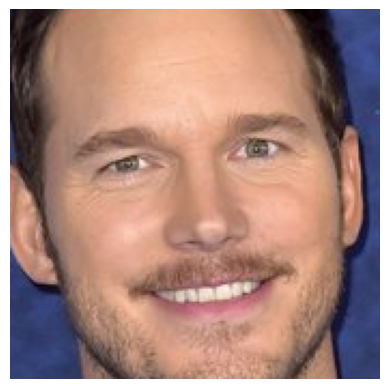

In [54]:
faces = face_cascade.detectMultiScale(imgGray) # detecta todas las caras que haya en la imagen
for (x, y, w, h) in faces:
    f = imgRGB[y:y+w,x:x+h]

plt.imshow(f)
plt.axis('off')


In [56]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()

img_tensor = torchvision.transforms.functional.to_tensor(f)
#img_tensor = img_tensor[:3]

img_embedding = resnet(img_tensor.unsqueeze(0))

data = [img_embedding.detach(), "chris"]
torch.save(data, 'data.pt')

In [ ]:
saved_data = torch.load('data.pt') # loading data.pt file
embedding_list = saved_data[0] # getting embedding data
name_list = saved_data[1] # getting list of names
dist_list = [] # list of matched distances, minimum distance is used to identify the person